In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.spatial.distance import pdist
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [2]:
raw_df=pd.read_csv('all_annotated.csv')

# filter out rows with median < 0
raw_df['median'] = raw_df.median(axis=1)
filter_data=raw_df.loc[raw_df['median']>0]
filter_data=filter_data.drop(['median'],axis=1)

# log2(data+0.1) transform
log_data=filter_data[filter_data.columns[2:18]]+0.1
log_data=log_data.apply(np.log2)

left=filter_data[filter_data.columns[0:2]]
df=left.join(log_data)


In [3]:
raw_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,18.002343
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.037699
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [4]:
# compute pairwise distance
data_mat=log_data.values
r_pdist=pdist(data_mat)
c_pdist=pdist(np.transpose(data_mat))

# hierarchical clustering
Z_row=linkage(r_pdist, 'ward')
Z_col=linkage(c_pdist, 'ward')

In [5]:
r_order=leaves_list(Z_row)
c_order=leaves_list(Z_col)

In [6]:
clustered_data = log_data.iloc[np.array(r_order),np.array(c_order)]
left_clustered = left.iloc[np.array(r_order)]
clusters = left_clustered.join(clustered_data)
clusters

,t_name,gene_name,male_12,female_12,male_10,female_10,male_11,female_11,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_14A,female_14A,male_13,female_13
16945,FBtr0088035,Ef1alpha48D,12.934721,12.686953,12.670183,12.722926,12.813750,12.867688,12.968766,13.162684,13.063854,13.033016,12.898895,12.985335,12.928335,12.983538,12.856987,12.944601
21487,FBtr0100231,RpL41,12.433014,12.414387,12.250214,12.211794,11.247904,11.888512,13.315899,12.670927,12.957029,13.035814,12.852893,12.443481,12.830904,12.911454,12.560846,12.979426
918,FBtr0081639,alphaTub84B,10.722029,10.333407,10.329504,10.526979,10.934465,10.737289,11.855659,11.754094,11.984685,11.652179,11.681140,11.661965,11.067607,11.193248,10.743815,10.840464
11518,FBtr0076032,RpL10Ab,10.795758,10.517779,10.417125,10.417446,10.493041,10.918809,11.800301,11.606854,11.672828,11.483158,11.906460,11.543012,11.390469,11.637179,10.674436,11.092437
7492,FBtr0089422,RpS7,10.786691,10.476903,10.385360,10.580815,10.947841,11.164172,11.484327,11.452426,11.483044,11.189940,11.826114,11.616858,11.239565,11.213128,10.646758,11.211013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,FBtr0085250,mino,4.676290,4.173244,4.368432,3.578029,3.734366,4.998784,-3.321928,0.459418,-3.321928,-3.321928,-3.321928,1.584866,1.022778,0.858330,2.414056,-3.321928
18077,FBtr0087363,CG11807,5.112638,1.759061,2.571355,3.288537,3.362584,4.735950,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,3.239246,4.323013,3.078899,5.398089,-3.321928
6358,FBtr0301469,LpR1,2.689639,2.323187,2.134276,3.084756,-3.321928,2.179521,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,2.819882,3.669078,1.169102,1.832952,-3.321928
14117,FBtr0078350,Aef1,3.914116,1.805650,1.946598,1.848539,1.025071,3.557844,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,0.060088,2.055140,1.146803,-0.130872,-3.321928


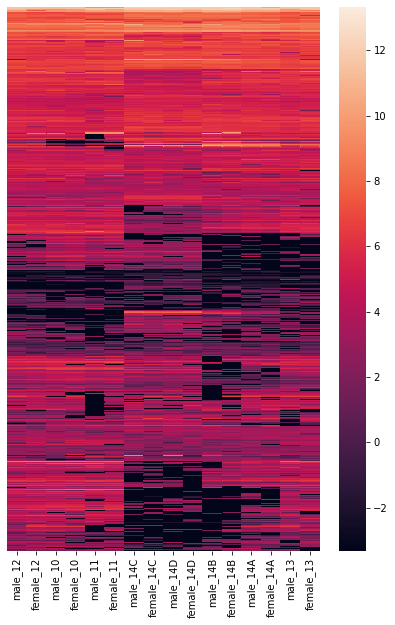

In [7]:
# plot heatmap
import seaborn as sns
# omitting labels for gene names (way too many)
sample_label=clustered_data.columns.tolist()

f, ax = plt.subplots(figsize=(7, 10))
ax = sns.heatmap(clustered_data.to_numpy(),xticklabels=sample_label,yticklabels=False)

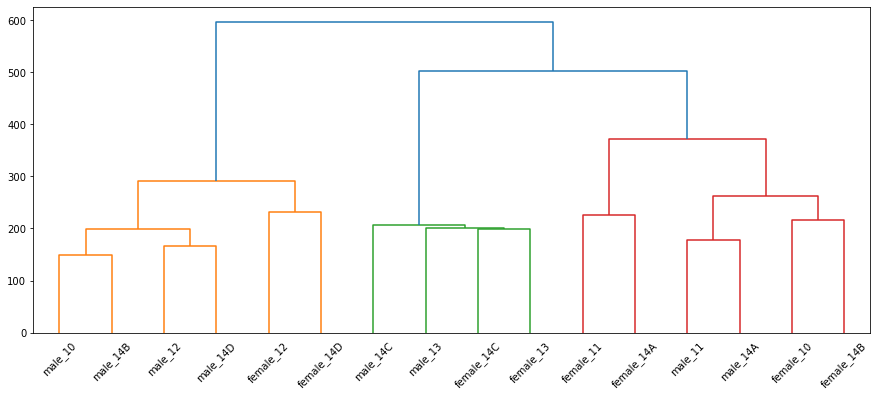

In [8]:
# plot dendrogram for samples

fig = plt.figure(figsize=(15, 6))
dn_c=dendrogram(Z_col,labels=sample_label,leaf_font_size=10, leaf_rotation=45)
plt.show()

In [9]:
# Differential expression


stages=[10, 11, 12, 13, 14, 14, 14, 14]
for i in range(0:8612):
    d10m=log_data.iloc[i,0]
    d10f=log_data.iloc[i,8]
    d11m=log_data.iloc[i,1]
    d11f=log_data.iloc[i,9]
    d12m=log_data.iloc[i,2]
    d12f=log_data.iloc[i,10]
    d13f=log_data.iloc[i,3]
    d13f=log_data.iloc[i,11]
    d14=[log_data.iloc[i,4],log_data.iloc[i,5],log_data.iloc[i,6],log_data.iloc[i,7]]
    d14f=[log_data.iloc[i,12],log_data.iloc[i,13],log_data.iloc[i,14],log_data.iloc[i,15]]
    # test if each gene is diff. expressed by stages (mixed sex)
    
    gene_exp_fm=d10m+d11m+d12m+d13m+d14m+d10f+d11f+d12f+d13f+d14f
    stages_fm=stages+stages
    
    olsmodel = smf.ols(gene_exp_fm, stages_fm)
    results = olsmodel.fit()
    results.pvalues[i]

In [13]:
d10=[log_data['male_10'].values[0], log_data['female_10'].values[0]]

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


[1, 2, 3, 2, 3]

In [35]:
d10=[log_data.iloc[0,0],log_data.iloc[0,8]]
d10

[4.573651064967696, 4.459054435736531]